In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import humanize
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib as mpl
mpl.rcParams['lines.markersize'] = 10              #

In [16]:
method_palette = { "LoFreq": "#9593D9",
                   "ShoRAH": "#ffe66d",
                   "CliqueSNV":  "#4ecdc4",
                   "VILOCA": "#ff6b6b",
                   "PredictHaplo": "#227c9d",
                   "ground_truth": "grey",}

mapping_methods = {
    'cliquesnv_local_haplo_snv_tf0.01': "CliqueSNV",
    'cliquesnv_local_haplo_snv': "CliqueSNV",
    'cliquesnv_local_haplo_tf0.01': "CliqueSNV",
    'cliquesnv_local_haplo': "CliqueSNV",
    'shorah_default': 'ShoRAH',
    'lofreq_local_haplo': 'LoFreq',
    'viloca_alpha_0.00001': 'VILOCA',
    'viloca_alpha_0.00001_K100': 'VILOCA',
    'viloca_multi': 'VILOCA',
    'ground_truth': "ground truth",
    'predicthaplo_local_haplo': 'PredictHaplo'
}

In [17]:
mapping_haplos = {
    '2@3@30@20@20@geom@0.75': 'Population 1', 
    '5@5@30@10@15@geom@0.75': 'Population 2',
    '5@10@30@10@10@geom@0.75': 'Population 3', 
    '5@15@30@10@15@geom@0.75': 'Population 4', 
    
    '2@3@600@400@400@geom@0.75': 'Population 5',
    '2@3@600@600@600@geom@0.75': 'Population 6',
    '5@5@600@200@300@geom@0.75': 'Population 7', 
    '5@10@600@200@240@geom@0.75': 'Population 8',
}

In [30]:
fname = "results/distance/performance_measures/performance_mutation_calls_freqs.csv"
df = pd.read_csv(fname).drop(columns=["Unnamed: 0"])

In [31]:
df.head()

,method,params,replicate,true_positive,false_negative,haplotype,frequency_groundtruth,frequency_predicted,posterior,position,variant
0,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,0,1,0,haplotype0000,0.327785,0.568,1.0,6,T
1,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,0,1,0,haplotype0000,0.327785,0.562,1.0,9,A
2,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,0,1,0,haplotype0000,0.327785,0.574,1.0,60,A
3,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,0,1,0,haplotype0000,0.327785,0.327,1.0,66,A
4,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,0,1,0,haplotype0000,0.327785,0.566,1.0,67,G


In [32]:
df['method'].unique()

array(['lofreq_local_haplo', 'shorah_default', 'viloca_alpha_0.00001'],
      dtype=object)

In [35]:
# What happens in Population 3 with LoFreq? Why are the frequency predictions so off? 
df[(df['params'].str.startswith('seq_tech~illumina__seq_mode~shotgun__seq_mode'))
  & (df['method']=="lofreq_local_haplo")  & (df['replicate']==1)
  & (df['position'].isin([50,51,52,53,54,55,56,57,]))
  & (df['params']=='seq_tech~illumina__seq_mode~shotgun__seq_mode_param~single_amplicon__read_length~249__genome_size~249__coverage~1000__haplos~5@10@30@10@10@geom@0.75')]


,method,params,replicate,true_positive,false_negative,haplotype,frequency_groundtruth,frequency_predicted,posterior,position,variant
17660,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,1,1,0,haplotype0002,0.142530,0.205,1.0,56,T
17706,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,1,1,0,haplotype0005,0.060130,0.205,1.0,56,T
17720,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,1,1,0,haplotype0006,0.045097,0.170,1.0,52,A
17735,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,1,1,0,haplotype0007,0.033823,0.170,1.0,52,A
17752,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,1,1,0,haplotype0008,0.025367,0.170,1.0,52,A
17767,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,1,1,0,haplotype0009,0.019025,0.170,1.0,52,A
17779,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,1,1,0,haplotype0010,0.014269,0.170,1.0,52,A
17790,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,1,1,0,haplotype0011,0.010702,0.170,1.0,52,A
17800,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,1,1,0,haplotype0012,0.008026,0.170,1.0,52,A
17811,lofreq_local_haplo,seq_tech~illumina__seq_mode~shotgun__seq_mode_...,1,1,0,haplotype0013,0.006020,0.170,1.0,52,A


In [37]:
# mutations in the ground truth are not unique, they occurr several per row with different frequencies as 
# they 

df = df.pivot_table(values='frequency_groundtruth', 
               index=['params', 'replicate', 'method', 'frequency_predicted', 'posterior', 'position', 'variant'],
               aggfunc='sum').reset_index()

In [38]:
df.loc[:, 'seq_tech'] = df['params'].str.split('~').str[1].str.split('__').str[0]
df.loc[:,'coverage'] = df['params'].str.split('~').str[6].str.split('\n').str[0]
df.loc[:, 'haplos'] = df['params'].str.split('~').str[7].str.split('\n').str[0]
df = df[df['haplos'].isin(mapping_haplos.keys())]
df["Method"] = df['method'].apply(lambda x: mapping_methods[x])
df["Population"] = df['haplos'].apply(lambda x: mapping_haplos[x])

In [39]:
df = df[df['posterior']>=0.9]

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_73835/373708036.py:4: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  g =sns.relplot(


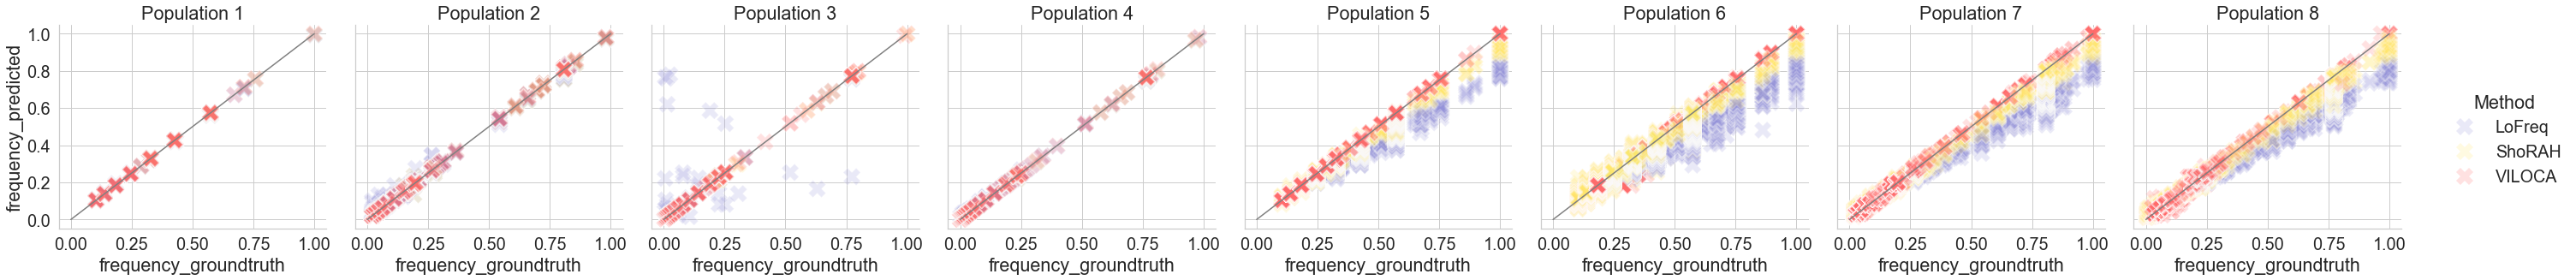

In [40]:
sns.set_theme(style="whitegrid", font_scale=1.8)
mpl.rcParams['lines.markersize'] = 20

g =sns.relplot(
    data=df,
    x='frequency_groundtruth', 
    y='frequency_predicted', 
    hue='Method',
    markers="X",
    style='Method',
    col='Population',
    col_order=["Population 1", "Population 2", "Population 3", "Population 4", "Population 5", "Population 6", "Population 7", "Population 8"],
    kind="scatter",
    legend=True,
    palette=method_palette,
    alpha=0.2
)

for ax in g.axes.flat:
    ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color='grey')

g.set_titles(col_template='{col_name}')
# , ylabel='estimated frequency', xlabel='ground truth frequency'
#g.set(yscale='log', xscale='log', xlim = (0,1), ylim=(0,1))
g.tight_layout()

In [41]:
# What happens in Population 3 with LoFreq? Why are the frequency predictions so off? 
df[(df['Population']=="Population 3")
  & (df['Method']=="LoFreq")  & (df['replicate']==1)
  & (df['position'].isin([50,51,52,53,54,55,56,57,58,59,60,61,62,63, 150,151,152,153,154,155,156,157,158,159,
                          160,161,162,163,218,219,220,221,222,223,224]))]['params'].unique()


array(['seq_tech~illumina__seq_mode~shotgun__seq_mode_param~single_amplicon__read_length~249__genome_size~249__coverage~1000__haplos~5@10@30@10@10@geom@0.75'],
      dtype=object)

/var/folders/dw/8dl4p6h53cgcmk6cf_09v5f40000gr/T/ipykernel_73835/2791891421.py:10: UserWarning: 
The markers list has fewer values (1) than needed (3) and will cycle, which may produce an uninterpretable plot.
  g =sns.relplot(


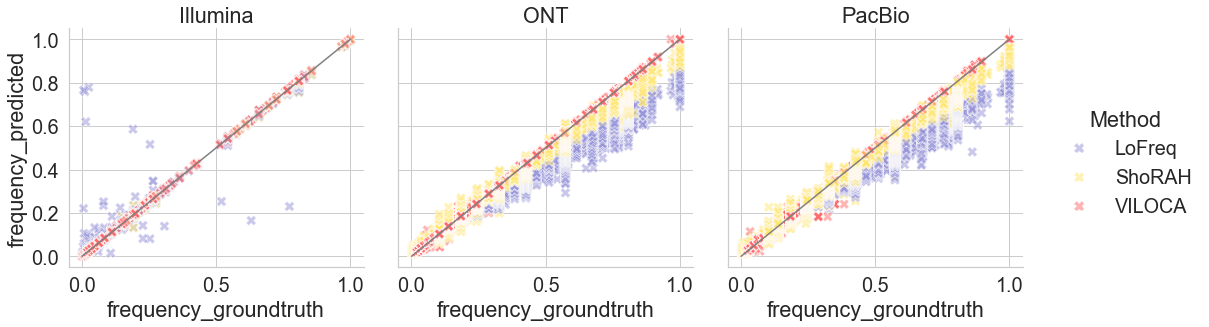

In [42]:
sns.set_theme(style="whitegrid", font_scale=1.8)
mpl.rcParams['lines.markersize'] = 10

mapping_seqtech = {'illumina': 'Illumina', 
                    'nanopore': 'ONT', 
                  'pacbio': 'PacBio'}

df["seq_tech"] = df['seq_tech'].apply(lambda x: mapping_seqtech[x])

g =sns.relplot(
    data=df,
    x='frequency_groundtruth', 
    y='frequency_predicted', 
    hue='Method',
    markers="X",
    style='Method',
    col='seq_tech',
    #col_order=["Population 1", "Population 2", "Population 3", "Population 4", "Population 5", "Population 6", "Population 7", "Population 8"],
    kind="scatter",
    legend=True,
    palette=method_palette,
    alpha=0.5
)

for ax in g.axes.flat:
    ax.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), color='grey')

g.set_titles(col_template='{col_name}')
# , ylabel='estimated frequency', xlabel='ground truth frequency'
#g.set(yscale='log', xscale='log', xlim = (0,1), ylim=(0,1))
g.tight_layout()
g.fig.savefig("distance__snvs_freqs.pdf")

In [47]:
g.fig.savefig('distance__snvs_freqs.png', dpi=1000)

In [46]:
g.fig.savefig('distance__snvs_freqs.svg')